In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from LearningAlgorithms import ClassificationAlgorithms
import seaborn as sns
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import joblib
# Plot settings
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [2]:
# --------------------------------------------------------------
# Load data
# --------------------------------------------------------------

df = pd.read_pickle("../../data/interim/03_data_features.pkl")
display(df)

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_max_freq,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_10,gyr_r_freq_0.5_Hz_ws_10,gyr_r_freq_1.0_Hz_ws_10,gyr_r_freq_1.5_Hz_ws_10,gyr_r_freq_2.0_Hz_ws_10,gyr_r_freq_2.5_Hz_ws_10,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:07.200,-0.185481,1.171386,-0.094891,-2.098496,-3.884052,0.626982,B,bench,heavy,30,...,0.0,-0.173446,0.602433,128.706945,-43.390234,9.256105,-31.591646,4.498836,14.634552,0
2019-01-11 15:08:07.600,-0.214236,0.971006,-0.197579,17.968302,3.848977,-6.132753,B,bench,heavy,30,...,0.0,-0.518639,0.402364,167.336141,-35.482211,-4.987927,10.043272,-37.308574,10.145121,0
2019-01-11 15:08:08.000,-0.170494,0.888970,-0.172353,-25.990313,-10.162423,25.426906,B,bench,heavy,30,...,0.0,-1.432766,0.305824,213.080873,11.217547,-25.623248,-23.594602,-28.300158,-24.993924,0
2019-01-11 15:08:08.400,-0.027634,0.878027,-0.056321,-4.311919,-1.963210,3.088785,B,bench,heavy,30,...,0.0,0.416303,0.255838,226.333033,4.948930,-8.689965,5.564550,59.076248,-0.339763,0
2019-01-11 15:08:08.800,-0.060139,0.982341,-0.036019,3.691356,-1.273743,-2.492890,B,bench,heavy,30,...,0.0,-0.204169,0.411183,183.274714,-47.248011,27.173982,14.005798,-6.169118,-17.432706,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.061740,-0.921306,0.112441,-36.980345,7.916154,15.033379,E,row,medium,90,...,0.0,-0.808252,0.304154,260.262012,30.091691,9.298315,-10.546926,-47.770133,-32.658597,4
2019-01-20 17:33:26.600,-0.022066,-1.214770,-0.111567,-4.451577,-1.081130,6.273530,E,row,medium,90,...,0.0,0.480691,0.251007,245.556360,-27.122545,5.849772,2.591904,43.555711,23.129684,1
2019-01-20 17:33:27.000,-0.045056,-0.974791,-0.061752,3.273522,-4.487268,0.133850,E,row,medium,90,...,0.0,-0.024009,0.262737,218.607329,-56.590266,-9.477854,4.331016,2.397771,8.976605,1


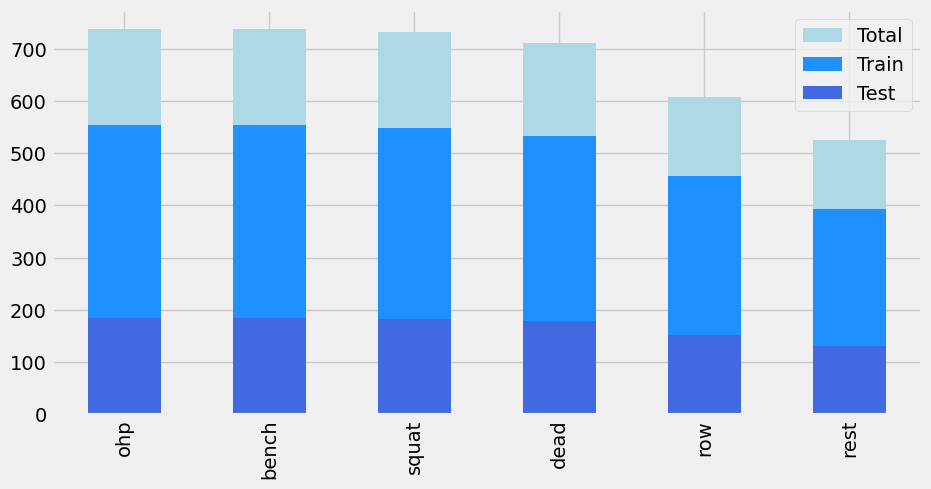

In [3]:
# --------------------------------------------------------------
# Create a training and test set
# --------------------------------------------------------------

df_train = df.drop(["participant", "category", "set"], axis=1)

# X is df_train without the label
X = df_train.drop("label", axis=1)
# Y is the label
y = df_train["label"]

# 75% of the data is used for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

fig, ax = plt.subplots(figsize=(10, 5))
df_train["label"].value_counts().plot(kind="bar", ax=ax, color="lightblue", label="Total")

y_train.value_counts().plot(kind="bar", ax=ax, color="dodgerblue", label="Train")
y_test.value_counts().plot(kind="bar", ax=ax, color="royalblue", label="Test")
plt.legend()
plt.show()


In [4]:
# --------------------------------------------------------------
# Split feature subsets
# --------------------------------------------------------------

basic_features = ["acc_x", "acc_y", "acc_z", "gyr_x", "gyr_y", "gyr_z"]
square_features = ["acc_r", "gyr_r"]
pca_features = ["pca_1", "pca_2", "pca_3"]
time_features = [f for f in df_train.columns if "_temp_" in f]
frequency_features = [f for f in df_train.columns if (("_freq" in f) or ("_pse" in f))]
cluster_features = ["cluster"]

df_train.columns[30:]

print("Basic features: ", len(basic_features))
print("Square features: ", len(square_features))
print("PCA features: ", len(pca_features))
print("Time features: ", len(time_features))
print("Frequency features: ", len(frequency_features))
print("Cluster features: ", len(cluster_features))


feature_set_1 = list(set(basic_features))
feature_set_2 = list(set(basic_features + square_features+ pca_features))
feature_set_3 = list(set(feature_set_2 + time_features))
feature_set_4 = list(set(feature_set_3 + frequency_features + cluster_features))

Basic features:  6
Square features:  2
PCA features:  3
Time features:  16
Frequency features:  72
Cluster features:  1


0
1
2
3
4
5
6
7
8
9


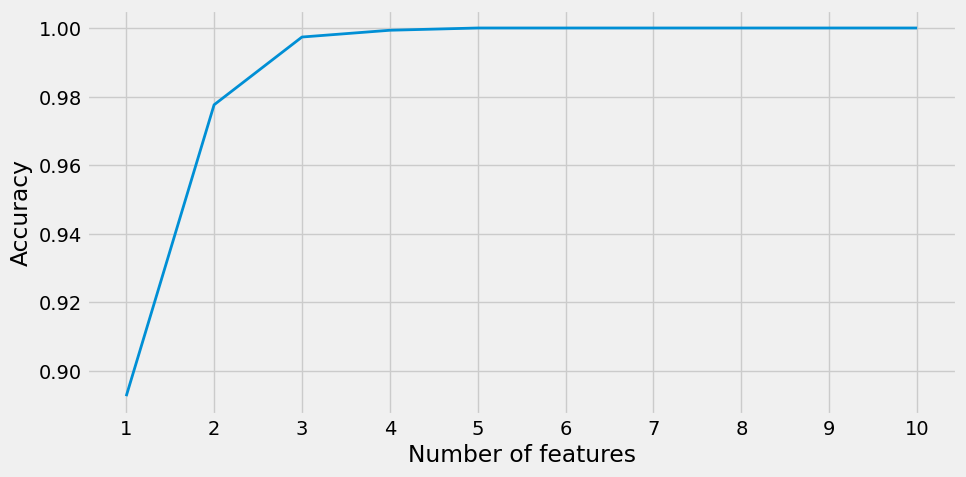

In [5]:
# --------------------------------------------------------------
# Perform forward feature selection using simple decision tree
# --------------------------------------------------------------

learner = ClassificationAlgorithms()

max_features = 10
selected_features, ordered_features, ordered_scores = learner.forward_selection(max_features, X_train, y_train)

selected_features = ['pca_1',
 'duration',
 'acc_x_freq_0.0_Hz_ws_10',
 'pca_2',
 'acc_y_freq_0.5_Hz_ws_10',
 'acc_x_temp_mean_ws_5',
 'gyr_r_freq_weighted',
 'gyr_x_temp_std_ws_5',
 'acc_x_freq_weighted',
 'acc_x_pse']

plt.figure(figsize=(10, 5))
plt.plot(range(1, max_features + 1, 1), ordered_scores)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, max_features + 1, 1))
plt.show()

In [6]:
# --------------------------------------------------------------
# Grid search for best hyperparameters and model selection
# --------------------------------------------------------------

possible_feature_sets = [feature_set_1, 
                         feature_set_2,
                         feature_set_3, 
                         feature_set_4, 
                         selected_features
                        ]

feature_names = ["Feature set 1",
                 "Feature set 2",
                 "Feature set 3",
                 "Feature set 4",
                 "Selected features"
                ]

iterations = 1

score_df = pd.DataFrame()


for i, f in zip(range(len(possible_feature_sets)), feature_names):
    print("Feature set:", i)
    selected_train_X = X_train[possible_feature_sets[i]]
    selected_test_X = X_test[possible_feature_sets[i]]

    # First run non deterministic classifiers to average their score.
    performance_test_nn = 0
    performance_test_rf = 0

    for it in range(0, iterations):
        print("\tTraining neural network,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(
            selected_train_X,
            y_train,
            selected_test_X,
            gridsearch=False,
        )
        performance_test_nn += accuracy_score(y_test, class_test_y)

        print("\tTraining random forest,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(
            selected_train_X, y_train, selected_test_X, gridsearch=True
        )
        performance_test_rf += accuracy_score(y_test, class_test_y)

    performance_test_nn = performance_test_nn / iterations
    performance_test_rf = performance_test_rf / iterations

    # And we run our deterministic classifiers:
    print("\tTraining KNN")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.k_nearest_neighbor(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_knn = accuracy_score(y_test, class_test_y)

    print("\tTraining decision tree")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.decision_tree(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_dt = accuracy_score(y_test, class_test_y)

    print("\tTraining naive bayes")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.naive_bayes(selected_train_X, y_train, selected_test_X)

    performance_test_nb = accuracy_score(y_test, class_test_y)

    # Save results to dataframe
    models = ["NN", "RF", "KNN", "DT", "NB"]
    new_scores = pd.DataFrame(
        {
            "model": models,
            "feature_set": f,
            "accuracy": [
                performance_test_nn,
                performance_test_rf,
                performance_test_knn,
                performance_test_dt,
                performance_test_nb,
            ],
        }
    )
    score_df = pd.concat([score_df, new_scores])

Feature set: 0
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 1
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 2
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 3
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 4
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes


,model,feature_set,accuracy
0,NN,Feature set 1,0.942744
1,RF,Feature set 1,0.956565
2,KNN,Feature set 1,0.768016
3,DT,Feature set 1,0.934847
4,NB,Feature set 1,0.875617
0,NN,Feature set 2,0.942744
1,RF,Feature set 2,0.960513
2,KNN,Feature set 2,0.766041
3,DT,Feature set 2,0.940770
4,NB,Feature set 2,0.873643


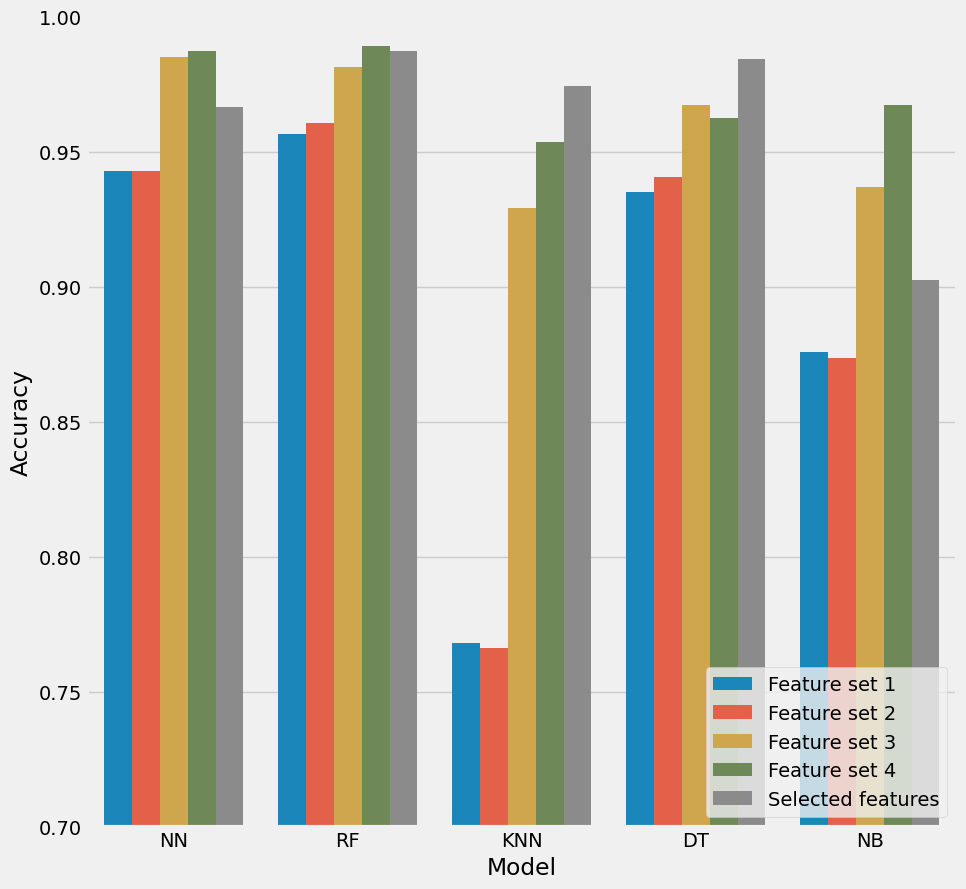

In [7]:
# --------------------------------------------------------------
# Create a grouped bar plot to compare the results
# --------------------------------------------------------------

score_df.sort_values(by="accuracy", ascending=False)
display(score_df)

plt.figure(figsize=(10, 10))
sns.barplot(x="model", y="accuracy", hue="feature_set", data=score_df)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1)
plt.legend(loc="lower right")
plt.show()

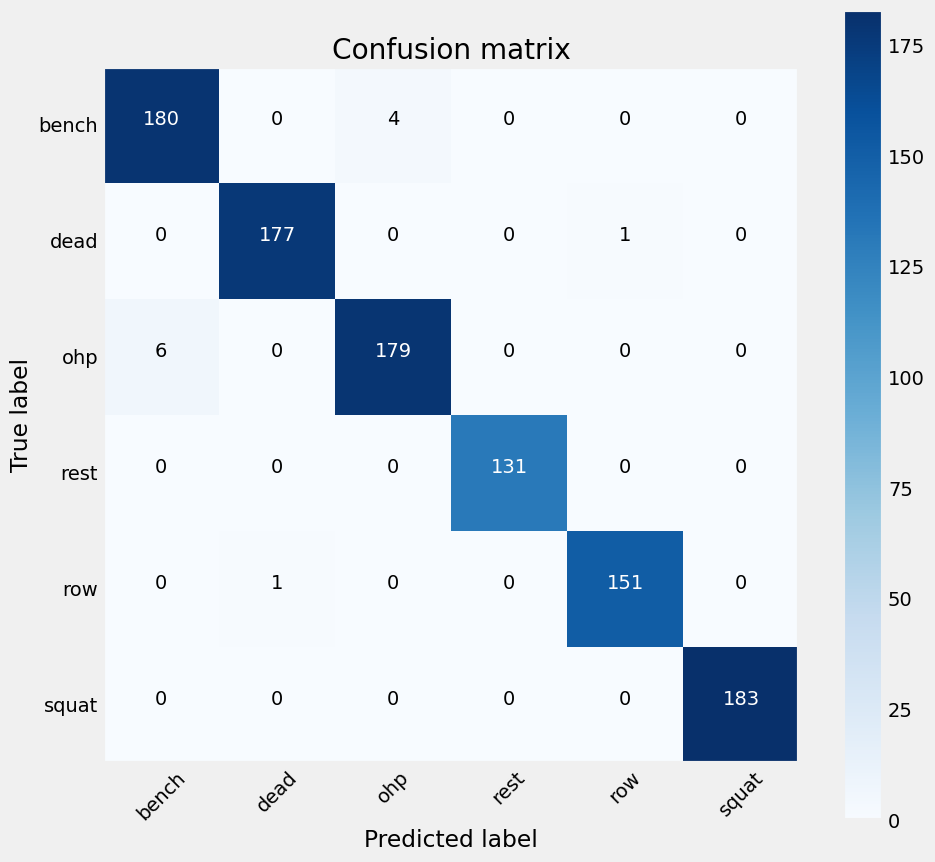

In [8]:
# --------------------------------------------------------------
# Select best model and evaluate results
# --------------------------------------------------------------

(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.random_forest(
    X_train[feature_set_4], y_train, X_test[feature_set_4], gridsearch=True
)

accuracy = accuracy_score(y_test, class_test_y)

classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels=classes)

# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

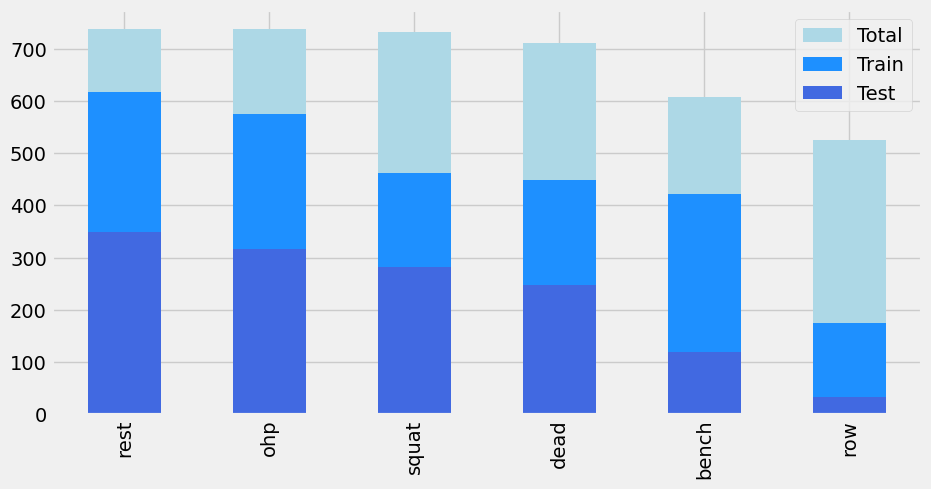

In [9]:
# --------------------------------------------------------------
# Select train and test data based on participant
# --------------------------------------------------------------

participant_df = df.drop(["category", "set"], axis=1)

X_train = participant_df[participant_df["participant"] != 'A'].drop("label", axis=1)
y_train = participant_df[participant_df["participant"] != 'A']["label"]

X_test = participant_df[participant_df["participant"] == 'A'].drop("label", axis=1)
y_test = participant_df[participant_df["participant"] == 'A']["label"]

fig, ax = plt.subplots(figsize=(10, 5))
df_train["label"].value_counts().plot(kind="bar", ax=ax, color="lightblue", label="Total")

y_train.value_counts().plot(kind="bar", ax=ax, color="dodgerblue", label="Train")
y_test.value_counts().plot(kind="bar", ax=ax, color="royalblue", label="Test")
plt.legend()
plt.show()


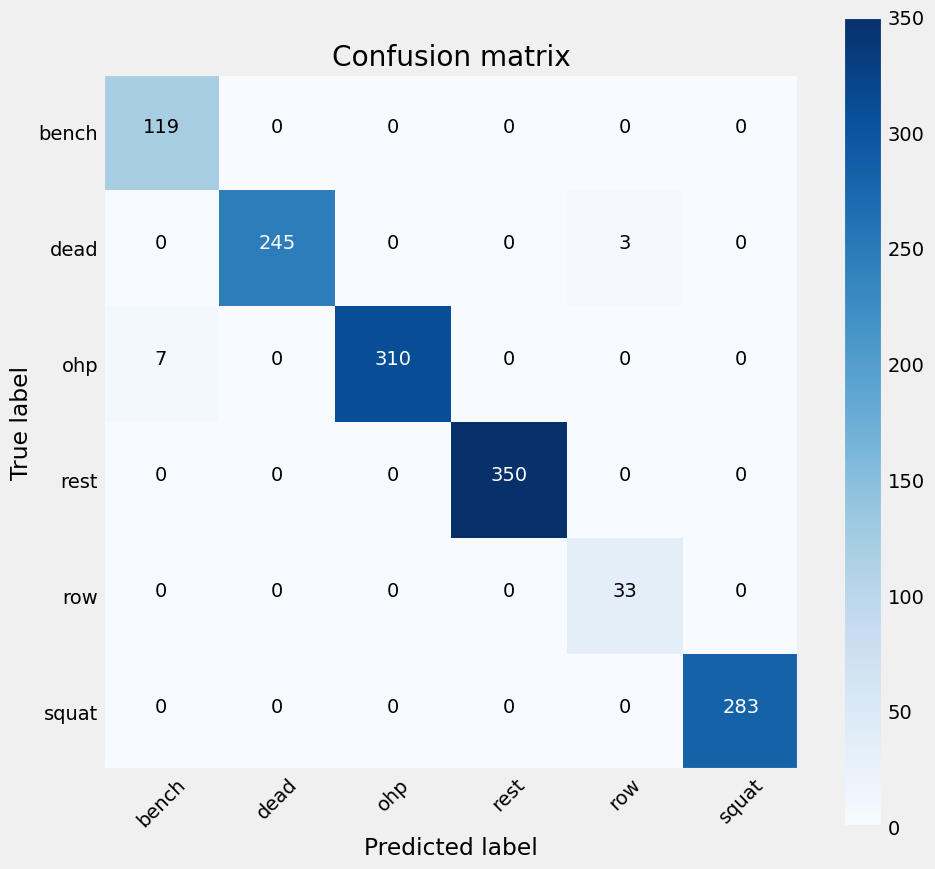

Accuracy:  0.9925925925925926


In [10]:
# --------------------------------------------------------------
# Use best model again and evaluate results
# --------------------------------------------------------------

(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.random_forest(
    X_train[feature_set_4], y_train, X_test[feature_set_4], gridsearch=True
)

accuracy = accuracy_score(y_test, class_test_y)

classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels=classes)

# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

print("Accuracy: ", accuracy)

In [11]:
# --------------------------------------------------------------
# Save final model & feature list for later testing
# --------------------------------------------------------------

# 1. Create full preprocessing pipeline
preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), feature_set_4)
], remainder='drop')  # Ensures only relevant features are used

# 2. Create complete model pipeline
full_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=100,
        min_samples_leaf=5,
        criterion="gini",
        random_state=42
    ))
])

# 3. Train on full data
full_pipeline.fit(X_train, y_train)

# 4. Save entire pipeline + metadata
save_dict = {
    'pipeline': full_pipeline,
    'feature_names': feature_set_4,
    'class_labels': y_train.unique().tolist()
}

joblib.dump(save_dict, "../../models/best_model.pkl")

['../../models/best_model.pkl']

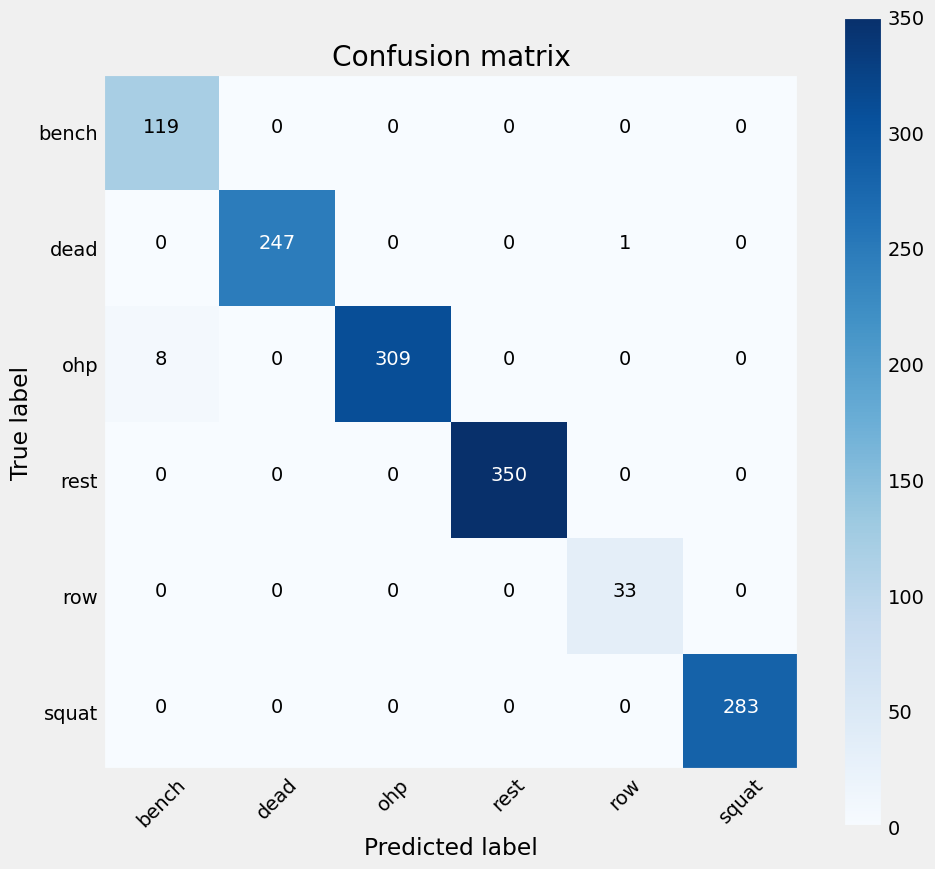

['pca_1', 'duration', 'acc_x_freq_0.0_Hz_ws_10', 'pca_2', 'acc_y_freq_0.5_Hz_ws_10', 'acc_x_temp_mean_ws_5', 'gyr_r_freq_weighted', 'gyr_x_temp_std_ws_5', 'acc_x_freq_weighted', 'acc_x_pse']
Accuracy:  0.9933333333333333


In [12]:
# --------------------------------------------------------------
# Try a more complex model with the selected features
# --------------------------------------------------------------

(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.feedforward_neural_network(
    X_train[feature_set_4], y_train, X_test[feature_set_4], gridsearch=False
)

accuracy = accuracy_score(y_test, class_test_y)

classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels=classes)

# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

print(selected_features)
print("Accuracy: ", accuracy)